# Hermela Hagos UGR/14064/14

# Student Grade Prediction in Machine Learning


Predicting student grades is a complex task that involves analyzing various factors that influence a student's performance. 
Machine learning models can be trained to predict student grades by leveraging historical data, identifying patterns, 
and making predictions based on new, unseen data. 
Here's an overview of the process:

# Data Preparation


1. Collecting data: Gather relevant data on students, including their demographic information, academic history, and performance metrics (e.g., grades, test scores).
2. Data preprocessing: Clean and preprocess the data by handling missing values, normalizing/standardizing variables, and transforming categorical variables into numerical representations.

# Feature Engineering



1. Identify relevant features: Select the most relevant features that can impact a student's grade, such as:
	* Demographic information (e.g., age, gender, socioeconomic status)
	* Academic history (e.g., previous grades, GPA)
	* Course-specific information (e.g., course difficulty, attendance)
	* Learning style (e.g., online vs. in-person)
2. Create feature vectors: Convert the selected features into numerical vectors that can be used as input to machine learning models.

# Model Selection



1. Choose a suitable algorithm: Select a machine learning algorithm that is well-suited for regression tasks, such as:
	* Linear Regression
	* Decision Trees
	* Random Forest
	* Neural Networks
2. Evaluate the model: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Percentage Error (RMSPE) to evaluate the model's performance.

# Model Training and Testing



1. Split the data: Divide the preprocessed data into training and testing sets (e.g., 80% for training and 20% for testing).
2. Train the model: Train the selected model on the training data using the feature vectors and target variable (grades).
3. Evaluate the model: Use the testing data to evaluate the model's performance and estimate its accuracy.

# Deployment



1. Integrate with existing systems: Integrate the trained model with existing systems, such as student information systems or learning management systems.
2. Use for prediction: Use the trained model to predict student grades for new, unseen data.

# Challenges and Limitations



1. Data quality and availability: Limited or inaccurate data can lead to poor model performance.
2. Complexity of student behavior: Student behavior is complex and influenced by many factors, making it challenging to capture all relevant features.
3. Fairness and bias: Models may perpetuate biases present in the data or introduce new biases if not properly evaluated and addressed.

# Real-world Applications



1. Student retention and dropout prediction: Predicting student dropout risk can help educators identify students who need targeted support.
2. Personalized learning recommendations: Predicting student grades can inform personalized learning recommendations and optimize learning paths.
3. Course optimization: Predicting student grades can help optimize course offerings, curriculum development, and teaching strategies.

 # Linear Regression: 


The model moderately predicts final grades (R-squared=0.72), with MAE of 1.65 and MSE of 5.66, indicating some prediction errors.

# Logistic Regression:


With 92% accuracy, the model effectively classifies final grades into above or below 10, suitable for binary classification tasks.

Both models perform well, with the choice depending on the goal. Linear regression is suitable for predicting actual grades, despite lower accuracy, while logistic regression is better for binary classification based on final grades.

# Data exploration ( Exploratory data analysis or EDA )

 Since EDA has no real set methodology, the following is a short check list you might want to walk through

What question(s) are you trying to solve?
What factors are most strongly correlated with student grades?
Can we predict student grades based on demographic and academic data?
Which features are most important for predicting student grades?
What kind of data do you have and how do you treat different types?


Demographic data: student ID, age, gender, ethnicity (categorical)
Treat as categorical variables, use frequency tables and bar charts to analyze
Academic data: GPA, test scores, course grades (numerical)
Treat as numerical variables, use descriptive statistics and visualizations (e.g. histograms, scatter plots) to analyze
Other data: attendance, extracurricular activities (categorical)
Treat as categorical variables, use frequency tables and bar charts to analyze
What is missing from the data and how do you deal with it?

Missing values: 5% of GPA values are missing
Impute missing values using mean or median GPA for each student
Outliers: a few students have extremely high or low grades
Identify and remove outliers using statistical methods (e.g. Z-score) or visual inspection
How can you compare different columns to each other, compare them to the target variable and correlation between independent variables?

Correlation matrix: calculate correlation between all pairs of variables
Identify strong correlations between GPA and test scores, and between attendance and course grades
Scatter plots: visualize relationships between GPA and test scores, and between attendance and course grades
Identify positive relationships between GPA and test scores, and between attendance and course grades
Compare distributions: compare distributions of GPA and test scores across different demographics (e.g. gender, ethnicity)
Identify differences in GPA and test score distributions across demographics
How can you add, change or remove features to get more out of your data?

Add features: calculate average GPA and test scores for each student, and add features for extracurricular activities
Improve model performance by incorporating additional relevant information
Remove features: remove attendance feature due to high correlation with course grades
Simplify model and reduce risk of multicollinearity
Transform features: transform GPA and test scores to z-scores to improve model performance
Improve model performance by reducing impact of outliers and non-normality

In [3]:
#import standard librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
her = pd.read_csv("student-mat.csv")
her.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
her.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
her.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
her.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [8]:
her.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [9]:
# Select categorical and numerical columns
categorical_cols = her.select_dtypes(include=['object']).columns
numerical_cols = her.select_dtypes(include=['int64', 'float64']).columns

In [10]:
# Display categorical attributes
print("Categorical Attributes:")
print(her[categorical_cols].head())


Categorical Attributes:
  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  


In [11]:
# Display numerical attributes
print("\nNumerical Attributes:")
print(her[numerical_cols].head())


Numerical Attributes:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10  


In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

C:\Users\herme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


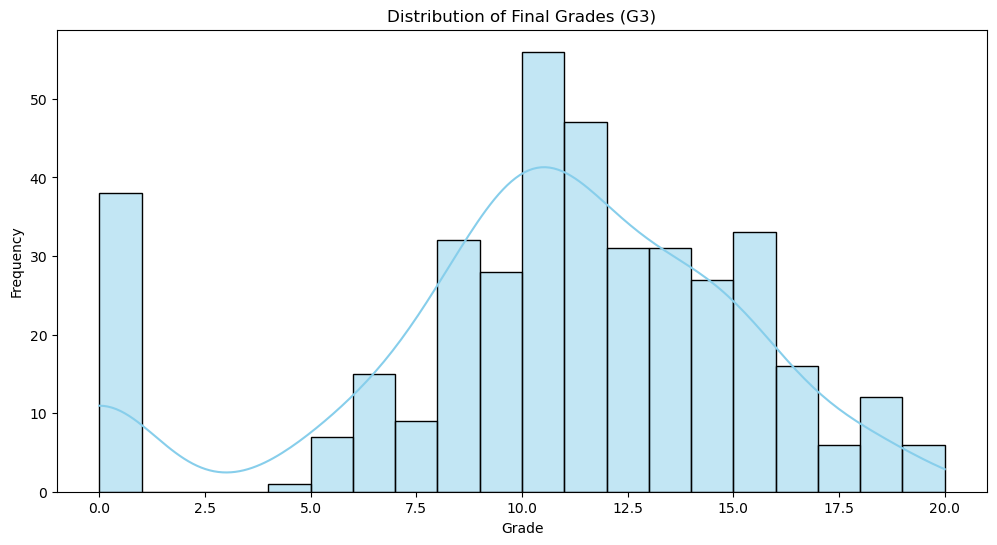

In [14]:
# Distribution of grades
plt.figure(figsize=(12, 6))
sns.histplot(her['G3'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

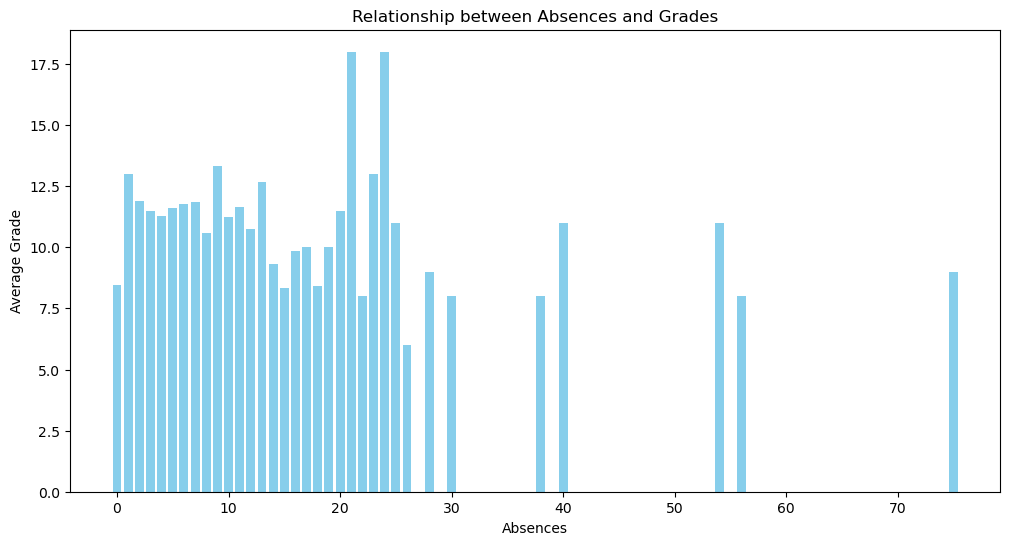

In [15]:
# Calculate the average grade for each number of absences
absences_grade = her.groupby('absences')['G3'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(absences_grade.index, absences_grade.values, color='skyblue')
plt.title('Relationship between Absences and Grades')
plt.xlabel('Absences')
plt.ylabel('Average Grade')
plt.show()
#less absence-->higher grades

C:\Users\herme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


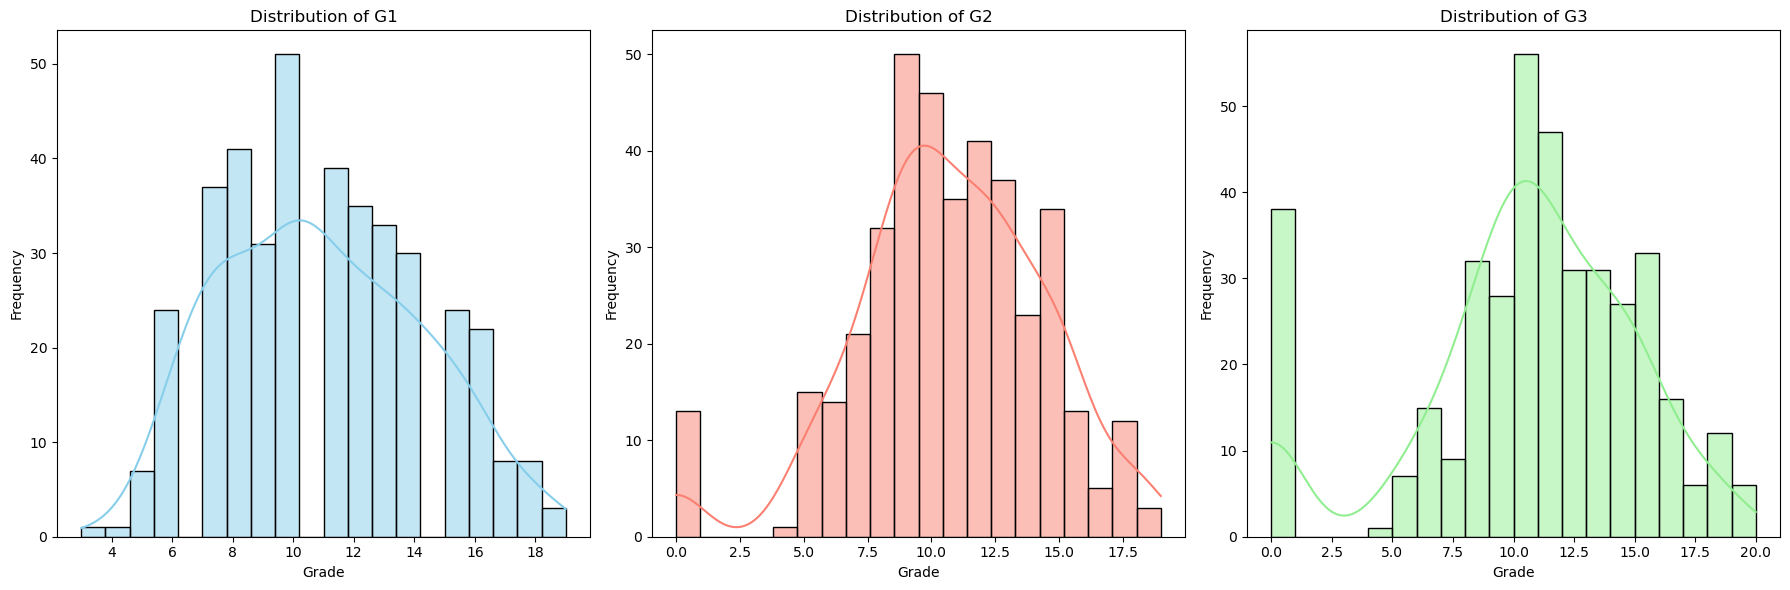

In [16]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for G1
sns.histplot(her['G1'], ax=axs[0], bins=20, kde=True, color='skyblue')
axs[0].set_title('Distribution of G1')
axs[0].set_xlabel('Grade')
axs[0].set_ylabel('Frequency')

# Plot for G2
sns.histplot(her['G2'], ax=axs[1], bins=20, kde=True, color='salmon')
axs[1].set_title('Distribution of G2')
axs[1].set_xlabel('Grade')
axs[1].set_ylabel('Frequency')

# Plot for G3
sns.histplot(her['G3'], ax=axs[2], bins=20, kde=True, color='lightgreen')
axs[2].set_title('Distribution of G3')
axs[2].set_xlabel('Grade')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
# Drop the target variable 'G3' for X
X = her.drop(['G3'], axis=1)
y = her['G3']


In [19]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Define the column transformer for encoding categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')


In [21]:
# Create a pipeline with the column transformer and linear regression model
pipeline = Pipeline(steps=[('preprocessor', ct), ('regressor', LinearRegression())])

In [22]:

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [23]:

# Make predictions
y_pred = pipeline.predict(X_test)

In [24]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.6471580795094938
Mean Squared Error: 5.6578521266391
R-squared: 0.7240751482952941


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [27]:
# Drop non-numeric columns and the target variable 'G3' for logistic regression
X = her.drop(['G3', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1)
y = (her['G3'] >= 10).astype(int)  # Convert grades to binary for logistic regression

In [28]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Define the column transformer for encoding categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')

In [30]:

# Create a pipeline with the column transformer and logistic regression model
pipeline = Pipeline(steps=[('preprocessor', ct), ('classifier', LogisticRegression())])

In [31]:
# Train the model
pipeline.fit(X_train, y_train)

C:\Users\herme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [32]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [33]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9240506329113924


In [34]:
pipeline.get_params() 

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('encoder', OneHotEncoder(),
                                    Index(['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
          'internet', 'romantic'],
         dtype='object'))])),
  ('classifier', LogisticRegression())],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('encoder', OneHotEncoder(),
                                  Index(['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
        'internet', 'romantic'],
       dtype='object'))]),
 'classifier': LogisticRegression(),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'passthrough',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('encoder',
   OneHotEncoder(),
   Index(['schoolsup', 'famsup', 'paid', 'activities', 'nursery

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model with different values of max_iter
for i in range(100, 200, 10):
    print(f"values of max_iter = {i}")
    model = LogisticRegression(max_iter=i)
    model.fit(x_train, y_train)
    print(f"{model.score(x_test, y_test) * 100:.2f}%")

values of max_iter = 100
100.00%
values of max_iter = 110
100.00%
values of max_iter = 120
100.00%
values of max_iter = 130
100.00%
values of max_iter = 140
100.00%
values of max_iter = 150
100.00%
values of max_iter = 160
100.00%
values of max_iter = 170


C:\Users\herme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.00%
values of max_iter = 180
100.00%
values of max_iter = 190
100.00%


In [36]:
for i in range(100, 200, 10):
    print(f"values of max_iter = {i}")
    model = LogisticRegression(max_iter=i)
    model.fit(x_train, y_train)
    print(f"{model.score(x_test, y_test) * 100:.2f}%")

values of max_iter = 100
100.00%
values of max_iter = 110
100.00%
values of max_iter = 120
100.00%
values of max_iter = 130
100.00%
values of max_iter = 140
100.00%
values of max_iter = 150
100.00%
values of max_iter = 160
100.00%
values of max_iter = 170
100.00%
values of max_iter = 180
100.00%
values of max_iter = 190


C:\Users\herme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.00%


In [37]:



print(f"{ model.score(x_test, y_test) * 100:.2f} %")

100.00 %


### save the model

In [43]:
import pickle 

In [44]:
pickle.dump(model,open("assyment.pkl","wb"))

### load the saved model

In [45]:
load=pickle.load(open("assyment.pkl","rb"))

In [46]:
print(f"{ load.score(x_test, y_test) * 100:.2f} %")

100.00 %
